Zadanie: kupujemy mieszkanie

Dane początkowe:

In [9]:
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt

value_apartment = 120000                                                                        # Wartość mieszkania obecnie
increase_value_apartment_per_year = 0.05                                                        # Wzrost ceny mieszkań w skali roku
increase_value_apartment_per_month = (1 + increase_value_apartment_per_year) ** (1/12) - 1      # Wzrost ceny mieszkań w skali miesiąca
rate = 0.12                                                                                     # Oprocentowanie lokat w skali roku
years = 5                                                                                       # Ilość lat
period_per_years = np.arange(years + 1)                                                         # Okres liczony w latach
period_per_month = np.arange(years*12 + 1)                                                      # Okres liczony w miesiącach

1. Ile będzie wynosiła orientacyjna cena mieszkania za 5 lat?

In [26]:
increase_value_apartment = np.round(value_apartment * (1 + increase_value_apartment_per_month) ** period_per_month, 2)
print(f"Orientacyjna cena mieszkania przy cenie początkowej {np.round(value_apartment,2)} PLN, przy założeniu wzrostu cen na poziomie: {increase_value_apartment_per_year*100} % w skali roku to: {np.round(np.max(increase_value_apartment),2)} PLN.")

[120000.   120488.89 120979.78 121472.67 121967.56 122464.47 122963.41
 123464.38 123967.39 124472.44 124979.56 125488.74 126000.   126513.34
 127028.77 127546.3  128065.94 128587.7  129111.58 129637.6  130165.76
 130696.07 131228.54 131763.18 132300.   132839.01 133380.21 133923.62
 134469.24 135017.08 135567.16 136119.48 136674.04 137230.87 137789.97
 138351.34 138915.   139480.96 140049.22 140619.8  141192.7  141767.94
 142345.52 142925.45 143507.75 144092.41 144679.46 145268.91 145860.75
 146455.   147051.68 147650.79 148252.33 148856.33 149462.79 150071.72
 150683.13 151297.03 151913.44 152532.35 153153.79]
Orientacyjna cena mieszkania przy cenie początkowej 120000 PLN, przy założeniu wzrostu cen na poziomie: 5.0 % w skali roku to: 153153.79 PLN.


2. Ile musisz wpłacać do banku każdego miesiąca, aby przy przedstawionej ofercie uzbierać na mieszkanie w ciągu 5 lat?

In [27]:
rate_month = rate / 12
month = years * 12

constans_month_payment = - npf.pmt(rate_month, month, 0, fv=np.max(increase_value_apartment))
print(f"Aby uzbierać kwotę {np.round(np.max(increase_value_apartment),2)} PLN w ciągu {years} lat przy oprocentowaniu lokaty {rate*100}% należy miesięcznie odkładać kwotę: {np.round(constans_month_payment,2)}PLN.")

Aby uzbierać kwotę 153153.79 PLN w ciągu 5 lat przy oprocentowaniu lokaty 12.0% należy miesięcznie odkładać kwotę: 1875.28PLN.


3. Stwórz wykres przedstawiający, jak w interwałach miesięcznych zmieniać się będzie cena mieszkania (liniowy wzrost w całym okresie) oraz wartość twojej lokaty.

In [ ]:
3.1. Musimy jeszcze stworzyć macierz prezentującą wartość oszczędności na lokacie:

In [34]:
n = np.arange(month + 1)

increase_value_bank = constans_month_payment * ((1 + rate_month) ** n - 1) / rate_month
increase_value_bank = np.round(increase_value_bank, 2)

[     0.     1875.28   3769.32   5682.3    7614.4    9565.83  11536.77
  13527.42  15537.98  17568.65  19619.62  21691.1   23783.29  25896.41
  28030.65  30186.24  32363.39  34562.31  36783.21  39026.33  41291.88
  43580.08  45891.16  48225.36  50582.9   52964.01  55368.93  57797.9
  60251.17  62728.96  65231.54  67759.13  70312.01  72890.41  75494.6
  78124.83  80781.36  83464.46  86174.39  88911.42  91675.81  94467.85
  97287.82 100135.98 103012.62 105918.03 108852.5  111816.3  114809.75
 117833.13 120886.75 123970.9  127085.89 130232.03 133409.64 136619.02
 139860.49 143134.38 146441.01 149780.7  153153.79]


In [ ]:
WYKRES:

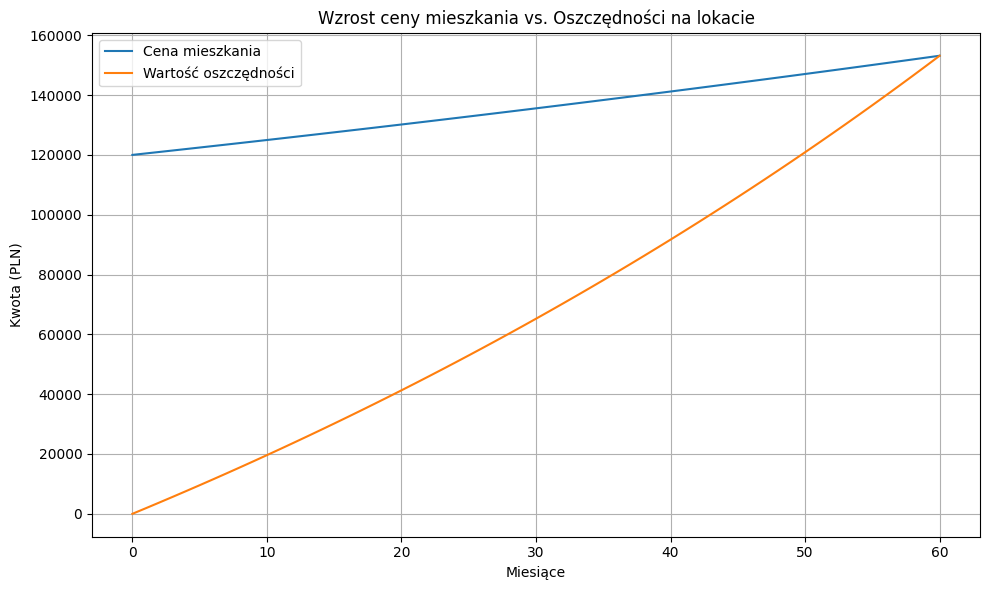

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(period_per_month, increase_value_apartment, label='Cena mieszkania')
plt.plot(n, increase_value_bank, label='Wartość oszczędności')
plt.xlabel("Miesiące")
plt.ylabel("Kwota (PLN)")
plt.title("Wzrost ceny mieszkania vs. Oszczędności na lokacie")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()